In [106]:
import numpy as np
from matplotlib.animation import FuncAnimation
%pylab inline
import pandas as pd

import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import os
import pickle

import importlib.util
params_file = '/Users/peterlafollette/Desktop/LGAR-Py/parameter_files/params_Fort_Assiniboine.py'
params = importlib.util.spec_from_file_location("params", params_file)
foo = importlib.util.module_from_spec(params)
params.loader.exec_module(foo)
params = foo



time_step = 300/3600 #time step expressed in hours. Used for summary calculations, make sure it's the same as the time step that is in the config file for the LGRA run you're analyzing.     


Populating the interactive namespace from numpy and matplotlib


In [107]:
###load HYDRUS results here

HYDRUS_output = pd.read_fwf('/Users/peterlafollette/Desktop/LGAR-Py/HYDRUS_files/Fort_Assiniboine_HYDRUS/T_Level.txt',widths=[13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13])            



In [108]:
###load LGAR results here

output = pd.read_pickle("/Users/peterlafollette/Desktop/LGAR-Py/outputs/output_Fort_Assiniboine.pkl")        


###states_array = np.load('states_array.npy')

In [109]:

output

,P(mm/h),PET(mm/h),runoff[mm/h],actual_infil[mm/h],ponded_head[mm],bottom_flux[mm/h],water_in_soil[mm],mass_bal_error(mm),actual_ET_per_step(mm)
Datetime_date,,,,,,,,,
2013-03-15 00:00:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0
2013-03-15 00:05:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0
2013-03-15 00:10:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0
2013-03-15 00:15:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0
2013-03-15 00:20:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2013-09-21 22:55:00,0.0,0.0,0.0,0.0,0,0.0,618.401188,0.0,0.0
2013-09-21 23:00:00,0.0,0.0,0.0,0.0,0,0.0,618.401188,0.0,0.0
2013-09-21 23:05:00,0.0,0.0,0.0,0.0,0,0.0,618.401188,0.0,0.0


In [110]:
output.head()

,P(mm/h),PET(mm/h),runoff[mm/h],actual_infil[mm/h],ponded_head[mm],bottom_flux[mm/h],water_in_soil[mm],mass_bal_error(mm),actual_ET_per_step(mm)
Datetime_date,,,,,,,,,
2013-03-15 00:00:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0
2013-03-15 00:05:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0
2013-03-15 00:10:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0
2013-03-15 00:15:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0
2013-03-15 00:20:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0


In [111]:
output.tail()

,P(mm/h),PET(mm/h),runoff[mm/h],actual_infil[mm/h],ponded_head[mm],bottom_flux[mm/h],water_in_soil[mm],mass_bal_error(mm),actual_ET_per_step(mm)
Datetime_date,,,,,,,,,
2013-09-21 22:55:00,0.0,0.0,0.0,0.0,0,0.0,618.401188,0.0,0.0
2013-09-21 23:00:00,0.0,0.0,0.0,0.0,0,0.0,618.401188,0.0,0.0
2013-09-21 23:05:00,0.0,0.0,0.0,0.0,0,0.0,618.401188,0.0,0.0
2013-09-21 23:10:00,0.0,0.0,0.0,0.0,0,0.0,618.401188,0.0,0.0
2013-09-21 23:15:00,0.0,0.0,0.0,0.0,0,0.0,618.401188,0.0,0.0


In [112]:
###in LGAR python, actual ET is recorded as a mass per time step, so if one wants to view it as a flux, you have to incorporate the time step

actual_ET = []
for i in range(0,len(output)):
    actual_ET.append((1/time_step)*output['actual_ET_per_step(mm)'][i])

output['actual_ET[mm/h]'] = actual_ET



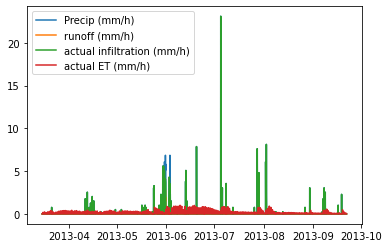

In [113]:
plt.plot(output['P(mm/h)'])
plt.plot(output['runoff[mm/h]'])
plt.plot(output['actual_infil[mm/h]'])
plt.plot(output['actual_ET[mm/h]'])

plt.legend(labels=['Precip (mm/h)','runoff (mm/h)','actual infiltration (mm/h)','actual ET (mm/h)'])

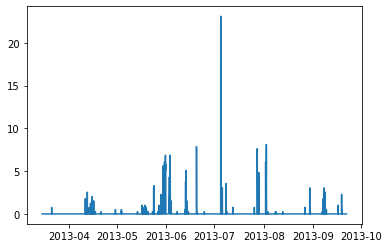

In [114]:
plt.plot(output['P(mm/h)'])

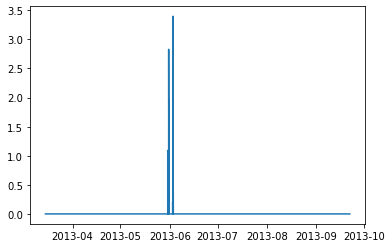

In [115]:
plt.plot(output['runoff[mm/h]'])

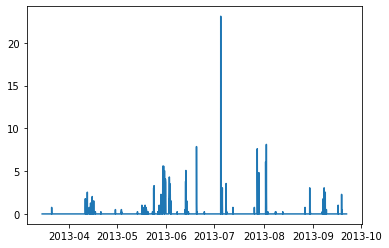

In [116]:
plt.plot(output['actual_infil[mm/h]'])

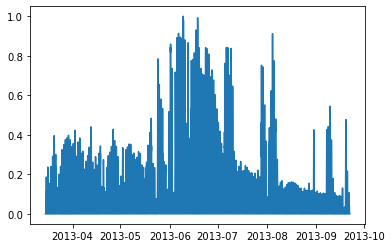

In [117]:
plt.plot(output['actual_ET[mm/h]'])

In [118]:

print('cumulative precip')
print(sum(output['P(mm/h)'])*5/60)
print(' ')
print('cumulative runoff')
print(sum(output['runoff[mm/h]'])*5/60)
print(' ')
#runoff_efficiency
print('runoff efficiency')
print(sum(output['runoff[mm/h]'])/sum(output['P(mm/h)']))

cumulative precip
361.18800000000005
 
cumulative runoff
10.54909642814316
 
runoff efficiency
0.029206663643706766


0.0

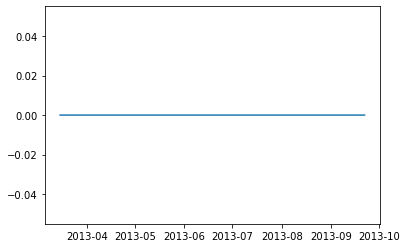

In [119]:
plt.plot(output['bottom_flux[mm/h]'])
np.mean(output['bottom_flux[mm/h]'])
np.min(output['bottom_flux[mm/h]'])

Text(0, 0.5, 'storage (mm)')

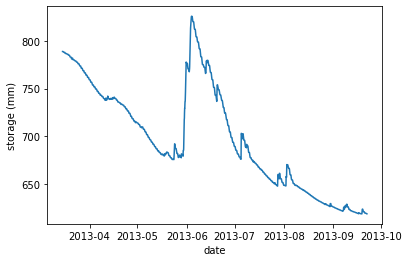

In [120]:
plt.plot(output['water_in_soil[mm]'])
plt.xlabel('date')
plt.ylabel('storage (mm)')
#plt.savefig('soil_water_storage.pdf')
#soil water storage 

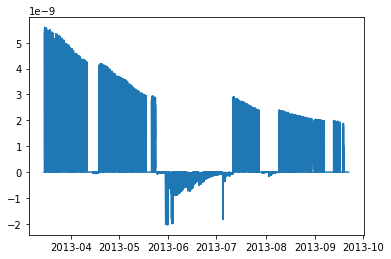

In [121]:
plt.plot(output['mass_bal_error(mm)'])

In [122]:
#cumulative precip (mm)
sum(output['P(mm/h)'])*time_step

361.188

In [123]:
#checking that cumulative infiltration + cumulative runoff is the same as cumulative precip
sum(output['actual_infil[mm/h]'])*300/3600 + sum(output['runoff[mm/h]'])*time_step

361.18800000000005

In [124]:
sum(output['runoff[mm/h]'])*time_step

10.549096428143159

In [125]:
sum(output['actual_infil[mm/h]'])*time_step

350.6389035718569

In [126]:
#computing cumulative fluxes per time step

cumulative_precip = []
cumulative_runoff = []
cumulative_infilt = []
cumulative_botflx = []
cumulative_evptrs = []
cumulative_evptrs_pot = []


accumulated_precip = 0
accumulated_runoff = 0
accumulated_infilt = 0
accumulated_botflx = 0
accumulated_evptrs = 0
accumulated_evptrs_pot = 0

for i in range(0,len(output)):
    accumulated_precip = accumulated_precip + output['P(mm/h)'][i]*time_step
    cumulative_precip = np.append(cumulative_precip,accumulated_precip)
    
    accumulated_runoff = accumulated_runoff + output['runoff[mm/h]'][i]*time_step
    cumulative_runoff = np.append(cumulative_runoff,accumulated_runoff)
    
    accumulated_infilt = accumulated_infilt + output['actual_infil[mm/h]'][i]*time_step
    cumulative_infilt = np.append(cumulative_infilt,accumulated_infilt)
    
    accumulated_botflx = accumulated_botflx + output['bottom_flux[mm/h]'][i]*time_step
    cumulative_botflx = np.append(cumulative_botflx,accumulated_botflx)
    
    accumulated_evptrs = accumulated_evptrs + output['actual_ET_per_step(mm)'][i]
    cumulative_evptrs = np.append(cumulative_evptrs,accumulated_evptrs)
    
    accumulated_evptrs_pot = accumulated_evptrs_pot + output['PET(mm/h)'][i]*time_step
    cumulative_evptrs_pot = np.append(cumulative_evptrs_pot,accumulated_evptrs_pot)
    
output['cumulative_precip'] = cumulative_precip
output['cumulative_runoff'] = cumulative_runoff
output['cumulative_infilt'] = cumulative_infilt
output['cumulative_botflx'] = cumulative_botflx
output['cumulative_evptrs'] = cumulative_evptrs
output['cumulative_evptrs_pot'] = cumulative_evptrs_pot


In [127]:
###now formatting HYDRUS outputs for plotting 

In [128]:
HYDRUS_datetime_vec = []
for i in range(0,len(HYDRUS_output['Time'])):
    current_dt = output.index[0] + dt.timedelta(minutes=HYDRUS_output['Time'][i])
    HYDRUS_datetime_vec.append(current_dt)

In [129]:
HYDRUS_output['HYDRUS_datetime_vec'] = HYDRUS_datetime_vec

In [130]:

HYDRUS_output = HYDRUS_output.set_index('HYDRUS_datetime_vec')

In [131]:
HYDRUS_output.head()

,Time,rTop,rRoot,vTop,vRoot,vBot,sum(rTop,) sum(rRoot,) sum(vTop,) sum(vRoot,...,hRoot,hBot,RunOff,sum(RunOff,) Volume,sum(Infil,) sum(Evap,) TLevel Cum(,WTrans) Snow,Layer
HYDRUS_datetime_vec,,,,,,,,,,,,,,,,,,,,,
2013-03-15 00:05:00,5.0,0.0,0.0,6.213700e-09,0.0,5.209600e-09,0.0,0.0,3.106800e-08,0.0,...,-3000.0,-2987.6,0.0,0.0,789.53,0.0,3.106800e-08,1 0.00,0.0,0.0
2013-03-15 00:10:00,10.0,0.0,0.0,8.585600e-10,0.0,6.402800e-10,0.0,0.0,3.536100e-08,0.0,...,-3000.0,-2982.3,0.0,0.0,789.53,0.0,3.536100e-08,2 0.00,0.0,0.0
2013-03-15 00:15:00,15.0,0.0,0.0,-1.948100e-09,0.0,7.428800e-09,0.0,0.0,2.562000e-08,0.0,...,-3000.0,-2977.2,0.0,0.0,789.53,0.0,3.536100e-08,3 0.00,0.0,0.0
2013-03-15 00:20:00,20.0,0.0,0.0,3.628900e-09,0.0,4.562000e-09,0.0,0.0,4.376500e-08,0.0,...,-3000.0,-2973.4,0.0,0.0,789.53,0.0,5.350600e-08,4 0.00,0.0,0.0
2013-03-15 00:25:00,25.0,0.0,0.0,2.209200e-09,0.0,1.709900e-09,0.0,0.0,5.481100e-08,0.0,...,-3000.0,-2969.9,0.0,0.0,789.53,0.0,6.455100e-08,5 0.00,0.0,0.0


In [132]:
HYDRUS_output.tail()

,Time,rTop,rRoot,vTop,vRoot,vBot,sum(rTop,) sum(rRoot,) sum(vTop,) sum(vRoot,...,hRoot,hBot,RunOff,sum(RunOff,) Volume,sum(Infil,) sum(Evap,) TLevel Cum(,WTrans) Snow,Layer
HYDRUS_datetime_vec,,,,,,,,,,,,,,,,,,,,,
2013-09-21 23:00:00,274980.0,0.0,0.0,1.266000e-09,0.0,8.675200e-09,156.29,517.47,-140.4,251.88,...,-6377.2,-4273.7,0.0,13.63,678.05,347.46,207.16,60502 0.00,0.0,0.0
2013-09-21 23:05:00,274985.0,0.0,0.0,6.839400e-10,0.0,-1.297400e-08,156.29,517.47,-140.4,251.88,...,-6373.2,-4273.7,0.0,13.63,678.05,347.46,207.16,60503 0.00,0.0,0.0
2013-09-21 23:10:00,274990.0,0.0,0.0,1.731700e-09,0.0,8.650500e-09,156.29,517.47,-140.4,251.88,...,-6369.3,-4273.8,0.0,13.63,678.05,347.46,207.16,60504 0.00,0.0,0.0
2013-09-21 23:15:00,274995.0,0.0,0.0,-7.276000e-11,0.0,8.638000e-09,156.29,517.47,-140.4,251.88,...,-6365.5,-4273.8,0.0,13.63,678.05,347.46,207.16,60505 0.00,0.0,0.0
2013-09-21 23:20:00,275000.0,0.0,0.0,2.299200e-09,0.0,8.625900e-09,156.29,517.47,-140.4,251.88,...,-6361.7,-4273.9,0.0,13.63,678.05,347.46,207.16,60506 0.00,0.0,0.0


In [133]:
HYDRUS_output = HYDRUS_output.resample('300S').interpolate()


Text(0.5, 0, 'date')

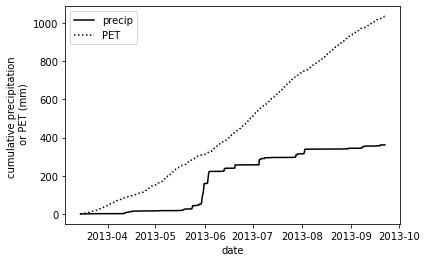

In [134]:
#cumulative forcing data mass curves
plt.plot(output['cumulative_precip'],color='black')
plt.plot(output['cumulative_evptrs_pot'],color='black',linestyle='dotted')
leg = plt.legend(['precip','PET'])
plt.ylabel('cumulative precipitation \n or PET (mm)')
plt.xlabel('date')


In [135]:
#more formatting for plotting of LGAR and HYDRUS results
times_to_plot = np.arange(time_step,12,time_step)


Text(0.5, 0, 'date')

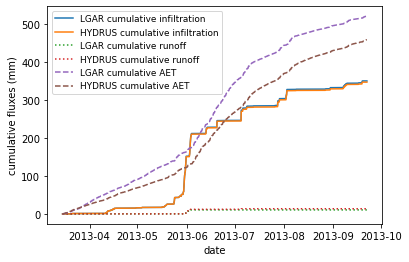

In [136]:
min_plt_len = min( len(output),len(HYDRUS_output) )
# plt.plot(np.array(output['cumulative_infilt'])[0:min_plt_len])
# plt.plot(np.array(HYDRUS_output['sum(Infil'])[0:min_plt_len])

plt.plot(output['cumulative_infilt'])[0:min_plt_len]
plt.plot(HYDRUS_output['sum(Infil'])[0:min_plt_len]

plt.plot(output['cumulative_runoff'],ls='dotted')[0:min_plt_len]
plt.plot(HYDRUS_output['sum(RunOff'],ls='dotted')[0:min_plt_len]

HYDRUS_AET = HYDRUS_output[')    sum(Evap'] + HYDRUS_output[')   sum(vRoot']

plt.plot(output['cumulative_evptrs'],ls='dashed')[0:min_plt_len]
plt.plot(HYDRUS_AET,ls='dashed')[0:min_plt_len]


leg = plt.legend(['LGAR cumulative infiltration','HYDRUS cumulative infiltration','LGAR cumulative runoff','HYDRUS cumulative runoff','LGAR cumulative AET','HYDRUS cumulative AET'],prop={'size':8.9})
plt.ylabel('cumulative fluxes (mm)')
#plt.xlabel('time (h)')
plt.xlabel('date')

In [137]:
###creating a vector that shows how closely LGAR cumulative infiltration mimics that of HYDRUS
percent_diff_cumulative_infiltration = []
for i in range(0, min(len(output)-2, len(HYDRUS_output))):
    percent_diff_cumulative_infiltration.append( abs((HYDRUS_output['sum(Infil'][i]- output['cumulative_infilt'][i])/HYDRUS_output['sum(Infil'][i]*100)) 

<ipython-input-137-a17cdb55cb1c>:4: RuntimeWarning: invalid value encountered in double_scalars
  percent_diff_cumulative_infiltration.append( abs((HYDRUS_output['sum(Infil'][i]- output['cumulative_infilt'][i])/HYDRUS_output['sum(Infil'][i]*100))


0.5688350333613257


Text(0.5, 0, 'time (h)')

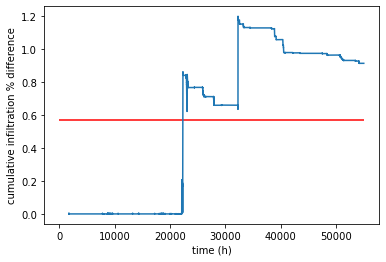

In [138]:
###only for synthetic tests, will give nan for real tests

plt.plot(percent_diff_cumulative_infiltration[0:])
plt.hlines(np.nanmean(percent_diff_cumulative_infiltration[0:]),xmin=0,xmax=len(output),color='red')
print(np.nanmean(percent_diff_cumulative_infiltration))
plt.ylabel('cumulative infiltration % difference')
plt.xlabel('time (h)')
#plt.savefig('cumulative_infil_percent_diff_Bushland.pdf')


In [139]:
output

,P(mm/h),PET(mm/h),runoff[mm/h],actual_infil[mm/h],ponded_head[mm],bottom_flux[mm/h],water_in_soil[mm],mass_bal_error(mm),actual_ET_per_step(mm),actual_ET[mm/h],cumulative_precip,cumulative_runoff,cumulative_infilt,cumulative_botflx,cumulative_evptrs,cumulative_evptrs_pot
Datetime_date,,,,,,,,,,,,,,,,
2013-03-15 00:00:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000
2013-03-15 00:05:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000
2013-03-15 00:10:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000
2013-03-15 00:15:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000
2013-03-15 00:20:00,0.0,0.0,0.0,0.0,0,0.0,788.967271,0.0,0.0,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-21 22:55:00,0.0,0.0,0.0,0.0,0,0.0,618.401188,0.0,0.0,0.0,361.188,10.549096,350.638904,0.0,521.205017,1034.958551
2013-09-21 23:00:00,0.0,0.0,0.0,0.0,0,0.0,618.401188,0.0,0.0,0.0,361.188,10.549096,350.638904,0.0,521.205017,1034.958551
2013-09-21 23:05:00,0.0,0.0,0.0,0.0,0,0.0,618.401188,0.0,0.0,0.0,361.188,10.549096,350.638904,0.0,521.205017,1034.958551


In [140]:
HYDRUS_output

,Time,rTop,rRoot,vTop,vRoot,vBot,sum(rTop,) sum(rRoot,) sum(vTop,) sum(vRoot,...,hRoot,hBot,RunOff,sum(RunOff,) Volume,sum(Infil,) sum(Evap,) TLevel Cum(,WTrans) Snow,Layer
HYDRUS_datetime_vec,,,,,,,,,,,,,,,,,,,,,
2013-03-15 00:05:00,5.0,0.0,0.0,6.213700e-09,0.0,5.209600e-09,0.00,0.00,3.106800e-08,0.00,...,-3000.0,-2987.6,0.0,0.00,789.53,0.00,3.106800e-08,1 0.00,0.0,0.0
2013-03-15 00:10:00,10.0,0.0,0.0,8.585600e-10,0.0,6.402800e-10,0.00,0.00,3.536100e-08,0.00,...,-3000.0,-2982.3,0.0,0.00,789.53,0.00,3.536100e-08,2 0.00,0.0,0.0
2013-03-15 00:15:00,15.0,0.0,0.0,-1.948100e-09,0.0,7.428800e-09,0.00,0.00,2.562000e-08,0.00,...,-3000.0,-2977.2,0.0,0.00,789.53,0.00,3.536100e-08,3 0.00,0.0,0.0
2013-03-15 00:20:00,20.0,0.0,0.0,3.628900e-09,0.0,4.562000e-09,0.00,0.00,4.376500e-08,0.00,...,-3000.0,-2973.4,0.0,0.00,789.53,0.00,5.350600e-08,4 0.00,0.0,0.0
2013-03-15 00:25:00,25.0,0.0,0.0,2.209200e-09,0.0,1.709900e-09,0.00,0.00,5.481100e-08,0.00,...,-3000.0,-2969.9,0.0,0.00,789.53,0.00,6.455100e-08,5 0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-21 23:00:00,274980.0,0.0,0.0,1.266000e-09,0.0,8.675200e-09,156.29,517.47,-1.404000e+02,251.88,...,-6377.2,-4273.7,0.0,13.63,678.05,347.46,2.071600e+02,60502 0.00,0.0,0.0
2013-09-21 23:05:00,274985.0,0.0,0.0,6.839400e-10,0.0,-1.297400e-08,156.29,517.47,-1.404000e+02,251.88,...,-6373.2,-4273.7,0.0,13.63,678.05,347.46,2.071600e+02,60503 0.00,0.0,0.0
2013-09-21 23:10:00,274990.0,0.0,0.0,1.731700e-09,0.0,8.650500e-09,156.29,517.47,-1.404000e+02,251.88,...,-6369.3,-4273.8,0.0,13.63,678.05,347.46,2.071600e+02,60504 0.00,0.0,0.0
